# Course Information
DDS8555 - Predictive Analysis<br>
Assignment 3<br>
Implement Linear Regression using the Abalone Dataset from Kaggle.com.

By - Samuel Mbah Nde
Due Date and Time: Sunday February 2nd 2025 at 11:59PM PST.

#  **Regression with the Abalone Dataset: Introduction and Goall**

## **Introduction**
The Abalone dataset is a well-known dataset used in predictive analytics and machine learning. It consists of various physical measurements of abalones, a type of marine mollusk, and aims to predict the age of an abalone based on these attributes. Since abalones do not have easily countable growth rings like trees, estimating their age is crucial for ecological research and commercial fisheries.

The dataset includes the following features.


| Variable Name | Role | Type | Description | Units | Missing Values | 
|---|---|---|---|---|---|
| Sex | Feature | Categorical | M, F, and I (infant) |  | no | 
| Length | Feature | Continuous | Longest shell measurement | mm | no | | Diameter | Feature | Continuous | Perpendicular to length | mm | no  
 | Height | Feature | Continuous | With meat in shell | mm | no|
 | Whole_weight | Feature | Continuous | Whole abalone | grams o| n  
 | Shucked_weight | Feature | Continuous | Weight of meat | gramns | o| 
 | Viscera_weight | Feature | Continuous | Gut weight (after bleeding) | gr ams |n | 
 | Shell_weight | Feature | Continuous | After being dried | g| rams  o | 
 | Rings | Target | Integer | +1.5 gives the age in years | 

 ## **Goal of This Exercise**
The objective of this regression task is to develop a predictive model that estimates the number of rings in an abalone based on its physical attributes. The key steps include:
1. **Exploratory Data Analysis (EDA)**: Understanding the dataset, identifying patterns, and handling missing values or outliers.
2. **Feature Engineering & Preprocessing**: Encoding categorical variables, normalizing numerical features, and selecting relevant predictors.
3. **Model Development**: Implementing a linear regression model to predict the target variable.
4. **Model Evaluation**: Assessing performance using appropriate regression metrics such as RMSE and R².
5. **Predictions on the Test Set**: Applying the trained model to make predictions and evaluating its generalization capability.
6. **Participate in the Kaggle competition**: Submit the produced model as late submission for this dataset.

Through this process, we will gain insights into feature relationships and assess how well linear regression models can capture the dependencies within the dataset.| no | 

## Import the packages needed to load and analyze the data set
I will load all the packages needed in one place to keep my code organized.

In [31]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import probplot
import re, os, json, requests, random
from datetime import datetime, timedelta, timezone
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
from sklearn import datasets
from ISLP import load_data
from ISLP.models import ModelSpec, poly
from functools import partial

## Set seed to ensure work is reproducible.

In [6]:
random.seed(6222)

## Load the data into pandas dataframes

In [8]:
path_to_data_files = 'Data/playground-series-s4e4'
train = pd.read_csv(f"{path_to_data_files}/train.csv")
test = pd.read_csv(f"{path_to_data_files}/test.csv")
sample_submission = pd.read_csv(f"{path_to_data_files}/sample_submission.csv")

train.shape, test.shape, sample_submission.shape 

((90615, 10), (60411, 9), (60411, 2))

## EDA

In this section, I will 
1) Inpect the datasets.
2) Check for the presense of NAs.
3) Rename columns to make it easier to explore using column dot notation.
4) Visuallize the data.

In [10]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


## Check for the Presense of NAs
The dataset documention indicates that there should be no nulls in the dataset.

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


## Rename Columns
Column names in the loaded data contain spaces which make them difficult to manipulate with dot notation.

From visually inspecting the column names, I see that there is a trend that can be used to reginerate new column names by removing white spaces and special characters and converting the words into title case.

In [15]:
def rename_column(column_name: str):
    words_in_column_name = re.findall(r'\w+', column_name)
    return ''.join([word.title() for word in words_in_column_name])

train.columns = [rename_column(column_name) for column_name in train.columns]
test.columns = [rename_column(column_name) for column_name in test.columns]

train.head()

,Id,Sex,Length,Diameter,Height,WholeWeight,WholeWeight1,WholeWeight2,ShellWeight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [16]:
test.head()

,Id,Sex,Length,Diameter,Height,WholeWeight,WholeWeight1,WholeWeight2,ShellWeight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [17]:
test.rename(columns={'WholeWeight1': 'ShuckedWeight', 'WholeWeight2': 'VisceraWeight'}, inplace=True)
train.rename(columns={'WholeWeight1': 'ShuckedWeight', 'WholeWeight2': 'VisceraWeight'}, inplace=True)
train.head()

,Id,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


## Create a summary table of metrics to compare.
Below, I compute summary statistics on train and test sets and merge them to compare. This approach will help with quickly spotting any columns that are unevenly distributed in the test and training sets.

In [19]:
def round_values(value, dp=3):
    if type(value) in [str, int]:
        return value
    return round(value, dp)

def get_outliers_iqr(data:list):
    """Detects outliers in a list of numbers using the IQR method."""
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = []
    for num in data:
        if num < lower_bound or num > upper_bound:
            outliers.append(num)
    return outliers

def compute_summary_numbers(df):
    summary_metrics = []
    total_recs = df.shape[0]
    for column in df.columns:
        values = df[column].values.tolist()  # Corrected column access
        n_unique = len(set(values))
        number_of_nulls = df[column].isna().sum()  # Calculate nulls directly
        number_of_valid = total_recs - number_of_nulls
        data_type = str(df[column].dtype)
        mean = np.mean(values)
        std = np.std(values)
        fisher_kurtosis = stats.kurtosis(values, fisher=True)
        pearson_kurtosis = stats.kurtosis(values, fisher=False)
        skewness = stats.skew(values)
        min_value = min(values)
        max_value = max(values)
        percentile_25 = np.percentile(values, 25)
        percentile_50 = np.percentile(values, 50)
        percentile_75 = np.percentile(values, 75)
        iqr = percentile_75 - percentile_25
        lower_bound = percentile_25 - 1.5 * iqr
        upper_bound = percentile_75 + 1.5 * iqr

        outliers = [value for value in values if value > upper_bound or value < lower_bound]
        if(data_type == 'object'):
            data_type = 'str'
        outliers_percentage = 100* len(outliers)/total_recs
        completeness = round(100* number_of_nulls / total_recs, 3)  # Calculate completeness
        raw_values = [column, data_type, n_unique, mean, std, fisher_kurtosis, pearson_kurtosis, skewness,
                      min_value, percentile_25, percentile_50, percentile_75, max_value, len(outliers), outliers_percentage]
        rounded_values = [round_values(value) for value in raw_values]
        summary_metrics.append(rounded_values)
    return pd.DataFrame(summary_metrics, columns=['ColumnName', 'DataType', 'NUnique', 'Mean', 'Std', 'FisherKurtosis', 'PeasonKurtosis',
                                       'Skewness', 'Min', '25thPercentile', '50thPercentile', '75thPercentile', 'Max', 'NOutliers', 'OutliersPercent'])

# Create a DataFrame from the collected summary statistics
train_summary = compute_summary_numbers(train.drop(['Id', 'Rings', 'Sex'], axis = 1))
test_summary = compute_summary_numbers(test.drop(['Id', 'Sex'], axis = 1))
train_summary

,ColumnName,DataType,NUnique,Mean,Std,FisherKurtosis,PeasonKurtosis,Skewness,Min,25thPercentile,50thPercentile,75thPercentile,Max,NOutliers,OutliersPercent
0,Length,float64,157,0.517,0.118,0.133,3.133,-0.732,0.075,0.445,0.545,0.600,0.815,1460,1.611
1,Diameter,float64,126,0.402,0.098,0.001,3.001,-0.695,0.055,0.345,0.425,0.470,0.650,1580,1.744
2,Height,float64,90,0.135,0.038,13.453,16.453,0.310,0.000,0.110,0.140,0.160,1.130,348,0.384
3,WholeWeight,float64,3175,0.789,0.458,-0.185,2.815,0.429,0.002,0.419,0.800,1.068,2.825,574,0.633
4,ShuckedWeight,float64,1799,0.341,0.204,0.284,3.284,0.592,0.001,0.178,0.330,0.463,1.488,967,1.067
5,VisceraWeight,float64,979,0.169,0.101,-0.204,2.796,0.477,0.001,0.086,0.166,0.232,0.760,440,0.486
6,ShellWeight,float64,1129,0.226,0.130,0.096,3.096,0.479,0.002,0.120,0.225,0.305,1.005,671,0.740


In [20]:
test_summary

,ColumnName,DataType,NUnique,Mean,Std,FisherKurtosis,PeasonKurtosis,Skewness,Min,25thPercentile,50thPercentile,75thPercentile,Max,NOutliers,OutliersPercent
0,Length,float64,148,0.517,0.118,0.142,3.142,-0.735,0.075,0.450,0.545,0.600,0.800,1110,1.837
1,Diameter,float64,130,0.402,0.097,0.004,3.004,-0.696,0.055,0.345,0.425,0.470,0.650,987,1.634
2,Height,float64,85,0.136,0.038,17.692,20.692,0.554,0.000,0.110,0.140,0.160,1.095,225,0.372
3,WholeWeight,float64,3037,0.790,0.458,-0.166,2.834,0.436,0.002,0.420,0.802,1.070,2.825,407,0.674
4,ShuckedWeight,float64,1747,0.341,0.204,0.290,3.290,0.593,0.001,0.178,0.329,0.464,1.488,579,0.958
5,VisceraWeight,float64,960,0.169,0.101,-0.205,2.795,0.476,0.001,0.086,0.166,0.232,0.641,305,0.505
6,ShellWeight,float64,1089,0.226,0.130,0.043,3.043,0.469,0.002,0.120,0.225,0.305,1.004,432,0.715


In [24]:
test_summary['DataSource'] = 'Test'
train_summary['DataSource'] = 'Train'

summary_stats = pd.concat(objs=[test_summary, train_summary], axis = 0)
summary_stats.sort_values(by=['ColumnName', 'DataSource'], inplace = True, ignore_index = True)
summary_stats.to_csv('SummaryOfDescriptiveStatisticsFromAbaloneDataset.csv', index = False)
summary_stats

,ColumnName,DataType,NUnique,Mean,Std,FisherKurtosis,PeasonKurtosis,Skewness,Min,25thPercentile,50thPercentile,75thPercentile,Max,NOutliers,OutliersPercent,DataSource
0,Diameter,float64,130,0.402,0.097,0.004,3.004,-0.696,0.055,0.345,0.425,0.470,0.650,987,1.634,Test
1,Diameter,float64,126,0.402,0.098,0.001,3.001,-0.695,0.055,0.345,0.425,0.470,0.650,1580,1.744,Train
2,Height,float64,85,0.136,0.038,17.692,20.692,0.554,0.000,0.110,0.140,0.160,1.095,225,0.372,Test
3,Height,float64,90,0.135,0.038,13.453,16.453,0.310,0.000,0.110,0.140,0.160,1.130,348,0.384,Train
4,Length,float64,148,0.517,0.118,0.142,3.142,-0.735,0.075,0.450,0.545,0.600,0.800,1110,1.837,Test
5,Length,float64,157,0.517,0.118,0.133,3.133,-0.732,0.075,0.445,0.545,0.600,0.815,1460,1.611,Train
6,ShellWeight,float64,1089,0.226,0.130,0.043,3.043,0.469,0.002,0.120,0.225,0.305,1.004,432,0.715,Test
7,ShellWeight,float64,1129,0.226,0.130,0.096,3.096,0.479,0.002,0.120,0.225,0.305,1.005,671,0.740,Train
8,ShuckedWeight,float64,1747,0.341,0.204,0.290,3.290,0.593,0.001,0.178,0.329,0.464,1.488,579,0.958,Test
9,ShuckedWeight,float64,1799,0.341,0.204,0.284,3.284,0.592,0.001,0.178,0.330,0.463,1.488,967,1.067,Train


In [32]:
summary_stats.to_clipboard(index = False)

## **Observations from the summary statistics comparison table**
From the table, one can see that the range of value of both train and test sets are very similar.

This gives us confidence in training model on the train set and evaluating on the test set.

In [38]:
train.Sex.value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

In [40]:
test.Sex.value_counts()

Sex
I    22241
M    20783
F    17387
Name: count, dtype: int64

## Visuallising the data
I first start with a pairplot of the training set.

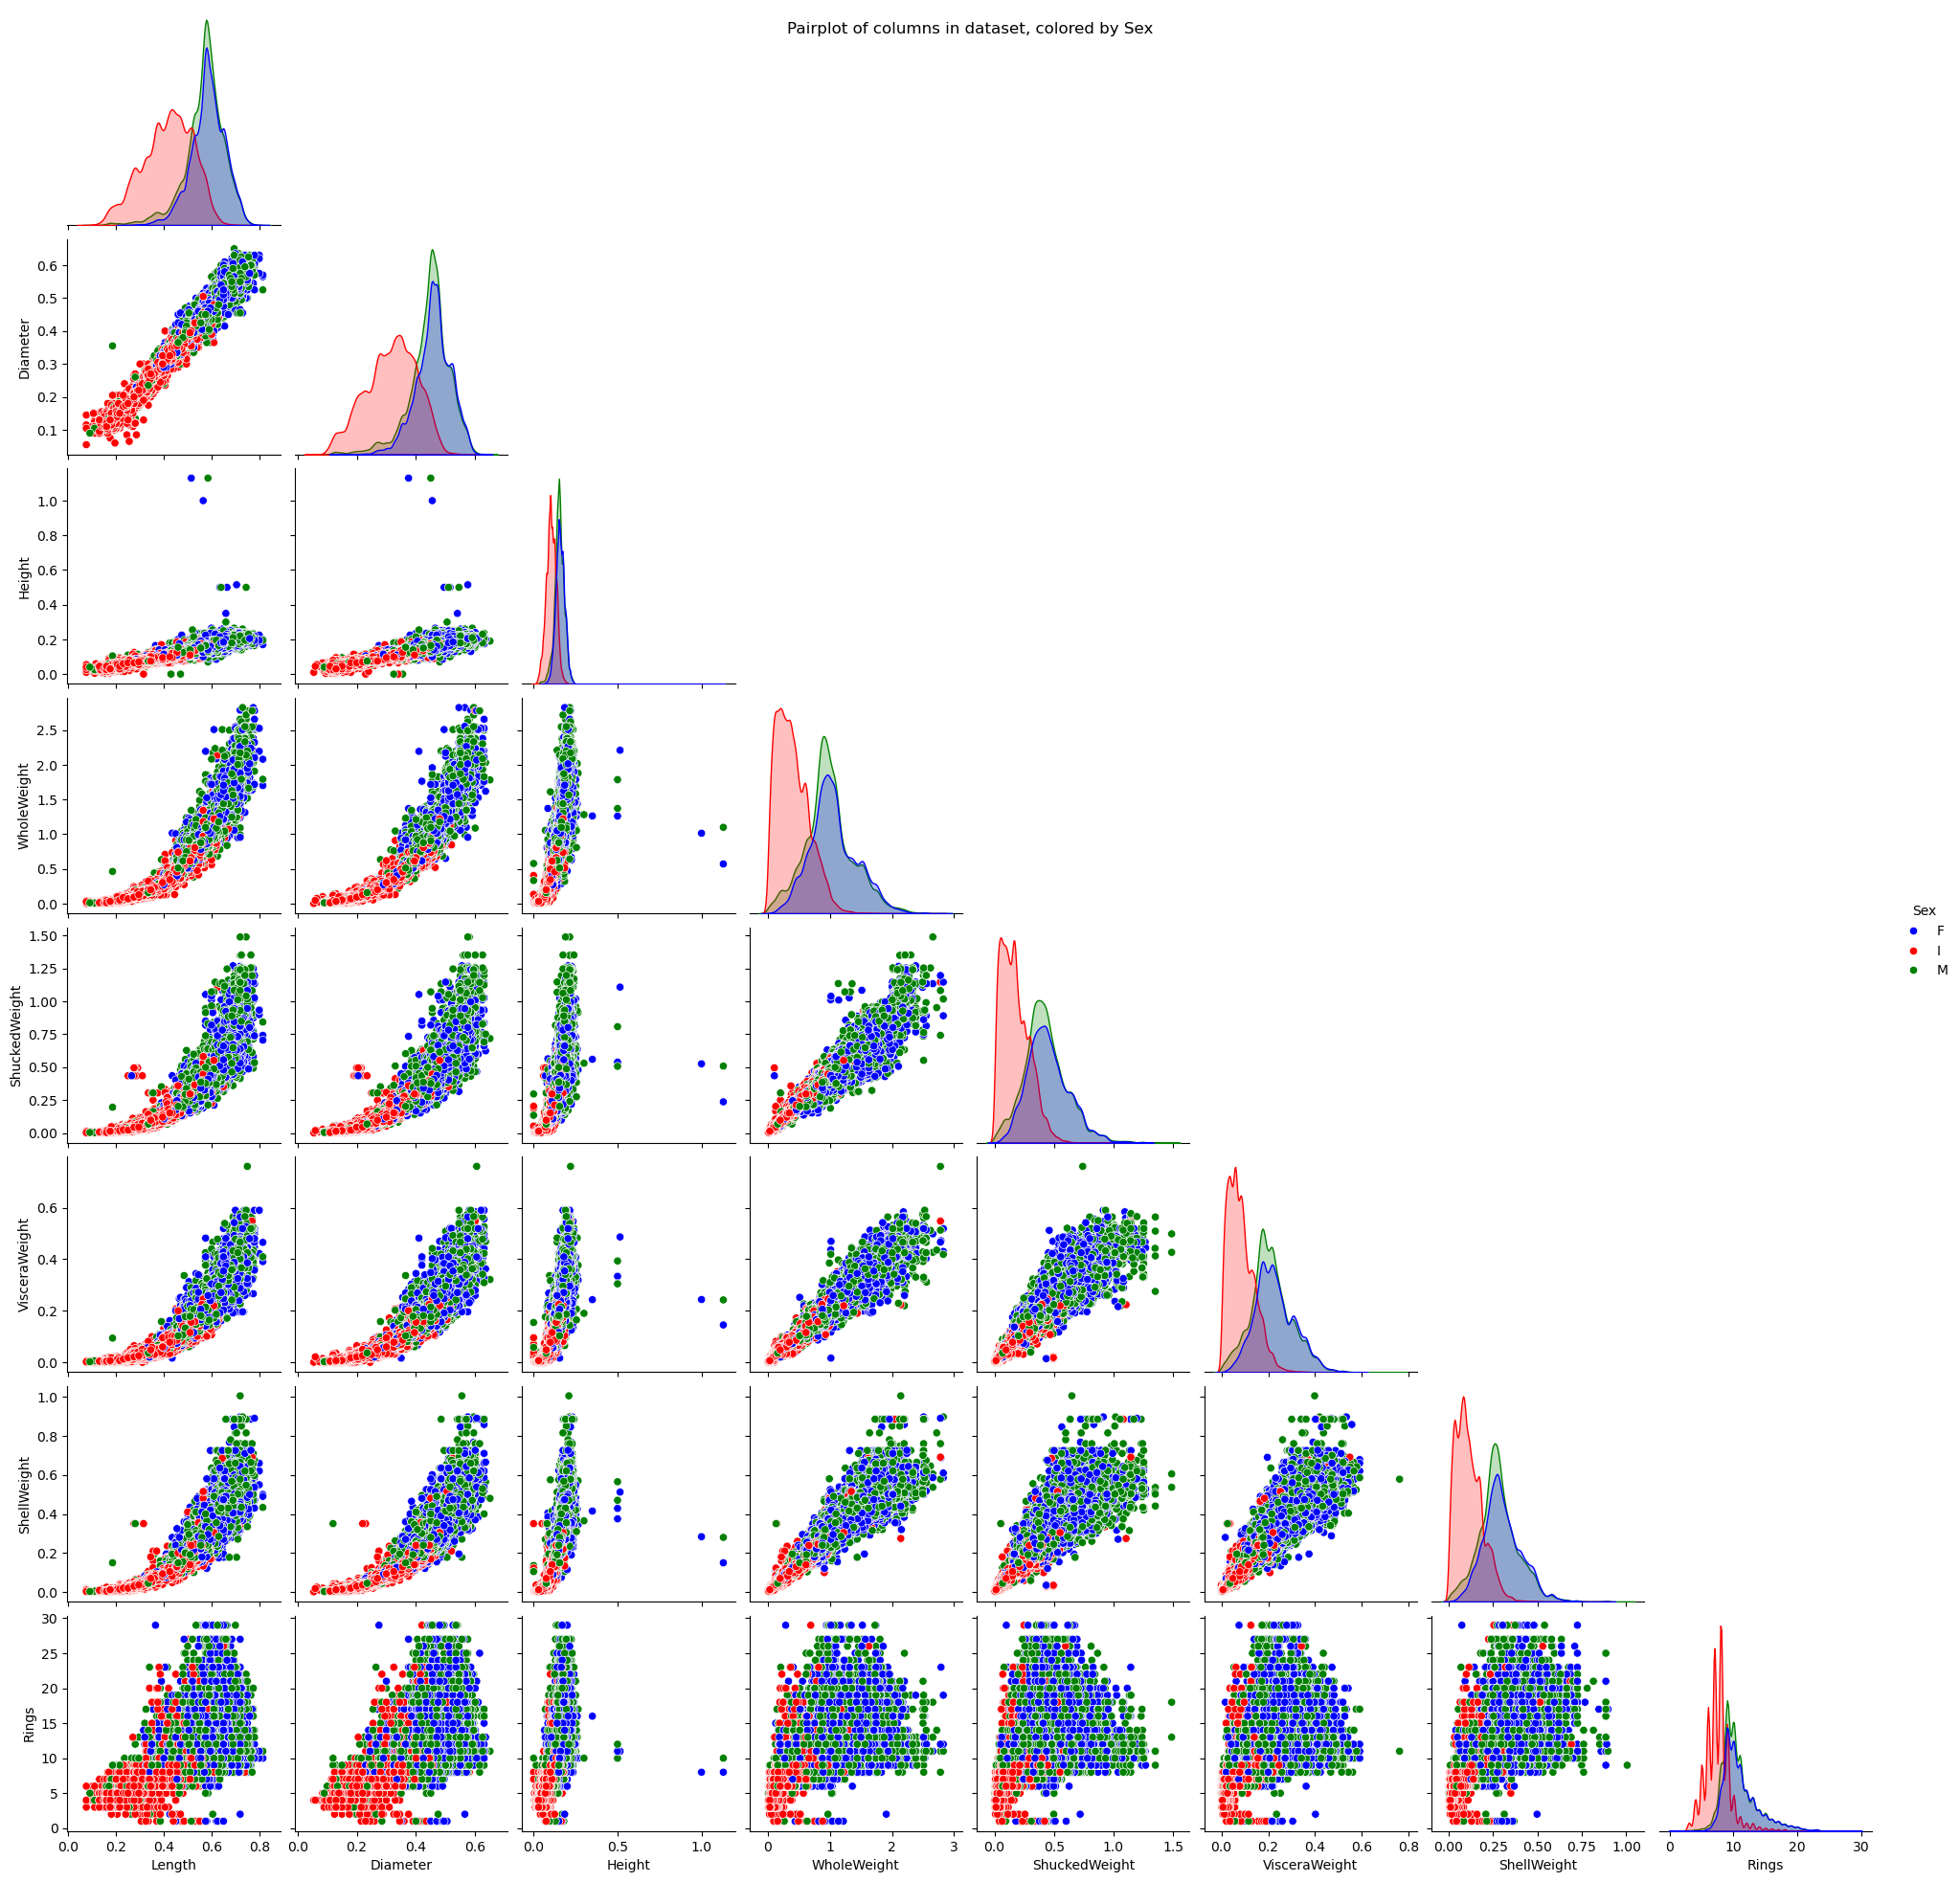

In [43]:
colors = [
    "blue",
    "red",
    "green",
    "gray",
    "orange",
    "purple",
    "brown",
    "pink",
    "cyan",
    "magenta"
]

g = sns.pairplot(train.drop('Id', axis=1), corner=True, diag_kind='kde', hue='Sex', palette=colors[:train.Sex.nunique()])
# Set the title of the plot
g.fig.suptitle("Pairplot of columns in dataset, colored by Sex")
plt.show()


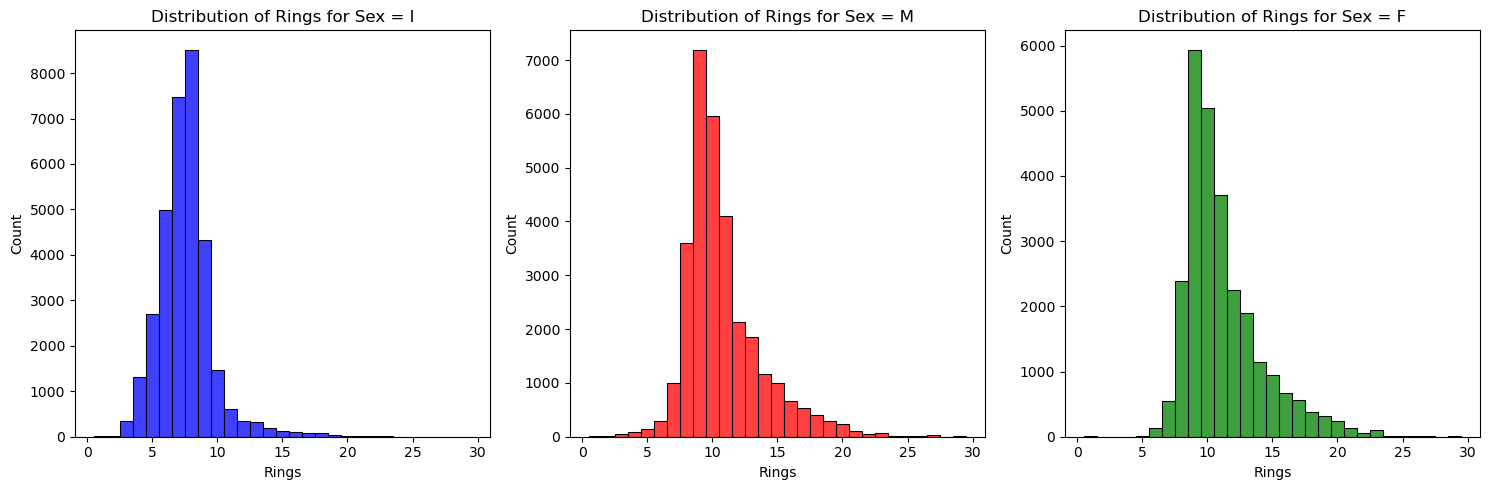

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

sex_categories = ['I', 'M', 'F']

for i, sex in enumerate(sex_categories):
    subset = train[train['Sex'] == sex]
    sns.histplot(data=subset, x="Rings", discrete=True, color=colors[i], ax=axes[i]) #color each sex differently

    axes[i].set_title(f"Distribution of Rings for Sex = {sex}") # Set title for each plot
    axes[i].set_xlabel("Rings") # Set x label for each plot
    axes[i].set_ylabel("Count") # Set y label for each plot

plt.tight_layout() 
plt.show()


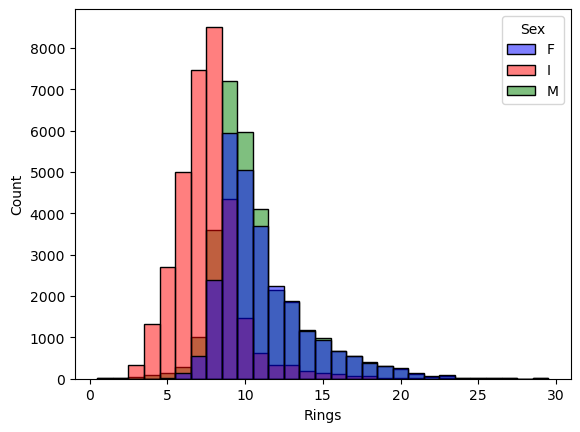

In [46]:
sns.histplot(data=train, x="Rings", hue="Sex", discrete=True, palette=colors[:train.Sex.nunique()])
plt.show()

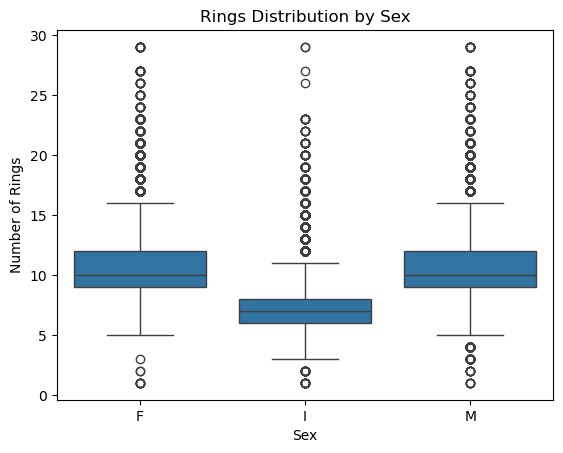

In [47]:
# Create the boxplot using seaborn
sns.boxplot(x='Sex', y='Rings', data=train)

# Customize the plot (optional)
plt.title('Rings Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Rings')

# Show the plot
plt.show()

## Observations from pairplots.
The graph shows that the relationship between the Rings and almost all the columns is roughly linear.

The graph also shows that the values of `Sex = I` are generally lower and distinct from those for Sexes `M and F` which show a very similar distributions.

## Create dummy variables for Sex

Since sex is categorical, I will create dummy variables for Sex to make before creating a model to ensure that the Sex is properly captured in the train and test sets.

In [64]:
train = pd.get_dummies(train, columns=['Sex'], dtype=int, drop_first = True)
train.head()

,Id,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex_I,Sex_M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,0,0
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,0,0
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,1,0
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0,1
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,1,0


## Apply the dummy variables created to the test set.
By observing the train set, one can see that the dummy for are for sexes M and I. This implies when Both sex I and M are 0, then would sex F = 1.

In [69]:
test = pd.get_dummies(test, columns=['Sex'], dtype=int, drop_first = True)
test.head()

,Id,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_I,Sex_M
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0,1
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0,1
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0,1
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0,1
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,1,0


## Note about getting dummies on train and test set.
Even though just applying get dummies on the test set is enough in this case because earlier inspection proved that both train and test sets included all the unique value of Sex. If this is not the case, one would have to ensure that the test set gets the same number of dummies. One approach for achieving this could be to append a fake (few) record(s) in the data set that is not fully covered or creating a new column.

Additionally, the dummies results in columns that may not share the same indexes in training and test sets. To ensure data in training set aligns with test set, it is a good idea to reindex both dataframes which I do below.

In [72]:
train_columns = [c for c in train.columns if c != 'Rings'] + ['Rings']
train = train[train_columns]
test = test[train_columns[:-1]]
train

,Id,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_I,Sex_M,Rings
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,0,0,11
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,0,0,11
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,1,0,6
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,0,1,10
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...
90610,90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,0,1,6
90611,90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,0,1,9
90612,90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,1,0,6
90613,90613,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,1,0,6


In [74]:
test

,Id,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_I,Sex_M
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0,1
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0,1
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0,1
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0,1
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,1,0
...,...,...,...,...,...,...,...,...,...,...
60406,151021,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,1,0
60407,151022,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,0,0
60408,151023,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,1,0
60409,151024,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,0,0


## Compute and Print Mean Errors.
Design a function to compute these errors and then I print them to the console.
The required method of evaluation from this dataset is in the screenshot below but I also add other evaluation methods.

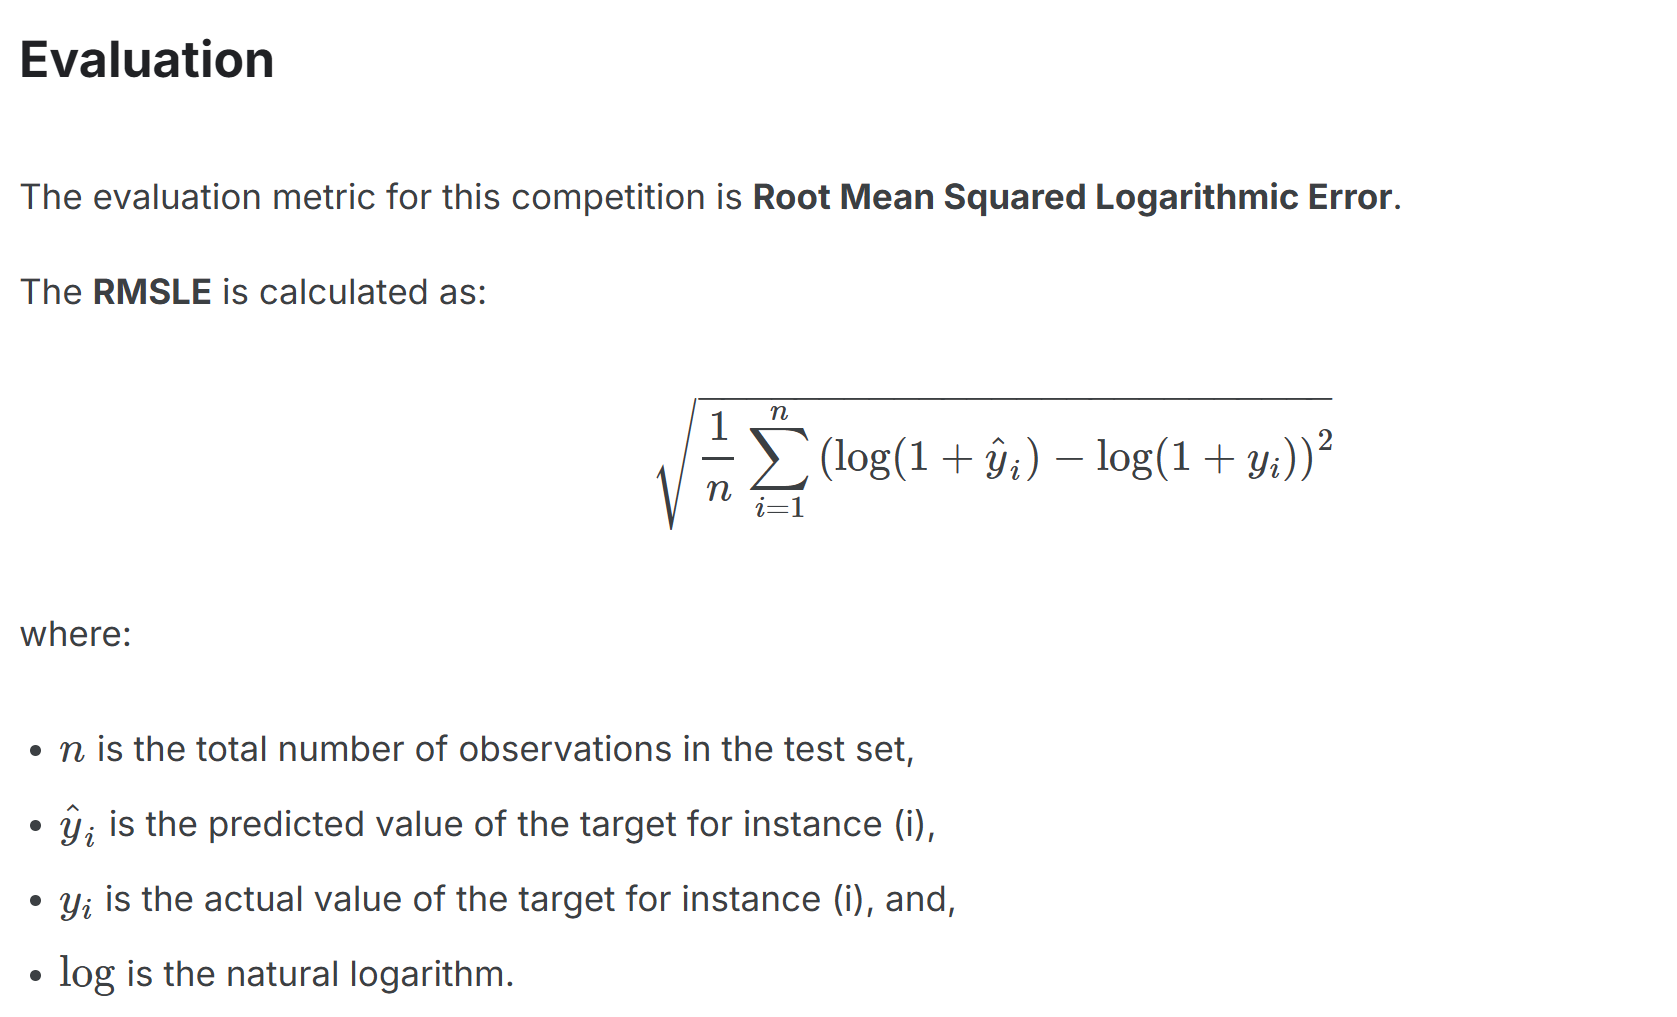

In [77]:
def adjusted_r2(y_true, y_pred, n, p):
    """
    Calculates the adjusted R-squared value.

    Parameters:
        y_true: True target values.
        y_pred: Predicted target values.
        n: Number of data points.
        p: Number of independent variables.
    """
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [79]:
def compute_and_print_mean_errors(y,yhat, params, title=None): 
    n_records = len(y)
    ME=np.round(np.mean(y-yhat),3) 
    MPE=np.round(np.mean((y-yhat)/y),3) 
    myMAE=np.round(mean_absolute_error(y,yhat),3) 
    myMSE=np.round(mean_squared_error(y,yhat),3) 
    myMAPE=np.round(mean_absolute_percentage_error(y,yhat),3)
    myRMSLogError = np.sqrt(np.average(np.square(np.log(1+np.abs(yhat)) - np.abs(1 + np.log(y)))))
    myR2 = r2_score(y, yhat)
    adjR2 = 1 - (1 - myR2) * ((n_records - 1) / (n_records - params - 1))
    if title:
        l = len(title) + 1
        print(f'\n{title}')
        print('-'*l)
    print("\n","ME:", np.round(ME,3),"\n","MPE:",MPE,"\n", "MAE:",  myMAE,"\n", "MSE:", myMSE,"\n","MAPE:",myMAPE,"\n myRMSLogError:", myRMSLogError,"\n R2:", myR2,"\n adjR2:", adjR2)
    return [ME, MPE, myMAE, myMSE, myMAPE, myRMSLogError, myR2, adjR2]

## Divide the dataset into training and test sets.
Sample 80% of the data for a training set stratifying on the `Sex` dummy column.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, 1:-1], train.iloc[:,-1], test_size=0.15, random_state=622, stratify=train['Sex_I	Sex_M'.split()])
# Add a constant to the predictors (for the intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the multiple regression model
model1 = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model1.summary())

# Extracting specific metrics
degrees_of_freedom_model = model1.df_model  # Model degrees of freedom
degrees_of_freedom_residual = model1.df_resid  # Residual degrees of freedom
f_statistic = model1.fvalue  # F-statistic
p_value = model1.f_pvalue  # p-value of the overall model significance
params = len(model1.params)-1
# Print key metrics
print("\nKey Metrics:")
print(f"Degrees of Freedom (Model): {degrees_of_freedom_model}")
print(f"Degrees of Freedom (Residual): {degrees_of_freedom_residual}")
print(f"F-statistic: {f_statistic}")
print(f"P-value of the overall model significance: {p_value}")

y_pred_test1 = model1.predict(X_test)
print('predicted', len(y_pred_test1), len(y_test))
compute_and_print_mean_errors(y_test, y_pred_test1, params)

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                 1.321e+04
Date:                Sun, 02 Feb 2025   Prob (F-statistic):               0.00
Time:                        19:30:49   Log-Likelihood:            -1.6200e+05
No. Observations:               77022   AIC:                         3.240e+05
Df Residuals:                   77012   BIC:                         3.241e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8420      0.066     58.588

[0.049,
 -0.033,
 1.415,
 4.254,
 0.143,
 0.9020643814293138,
 0.5987479464332544,
 0.5984820796525652]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, 1:-1], train.iloc[:,-1], test_size=0.15, random_state=622, stratify=train['Sex_I	Sex_M'.split()])

# Add a constant to the predictors (for the intercept)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

# Fit the linear regression model
model2 = LinearRegression()
model2.fit(X_train, y_train)
r2 = model2.score(X_test, y_test)
params = model2.n_features_in_ - 1
y_pred_test2 = model2.predict(X_test)
print(f'The coefficient of determination is {r2}')
compute_and_print_mean_errors(y_test, y_pred_test2, params)

The coefficient of determination is 0.6311087650837095

 ME: 0.049 
 MPE: -0.028 
 MAE: 1.35 
 MSE: 3.911 
 MAPE: 0.136 
 myRMSLogError: 0.9018340569089289 
 R2: 0.6311087650837095 
 adjR2: 0.6293635670474409


[0.049,
 -0.028,
 1.35,
 3.911,
 0.136,
 0.9018340569089289,
 0.6311087650837095,
 0.6293635670474409]

## Observations from the Two models.
We see that the second model outperforms the first model in every metric but the first model is only linear while the second model is polynomial. The second model is an improvement because it uses interactions and higher order terms which should capture the relationship much better. This makes sense when you factor in the fact that the pairplot we had earlier showed that there is some polynomial relationship between some of the variables. The second model with polynomial features seems to capture the relationship much better.

These observations can be summarized in the fitted vs observed plots below.

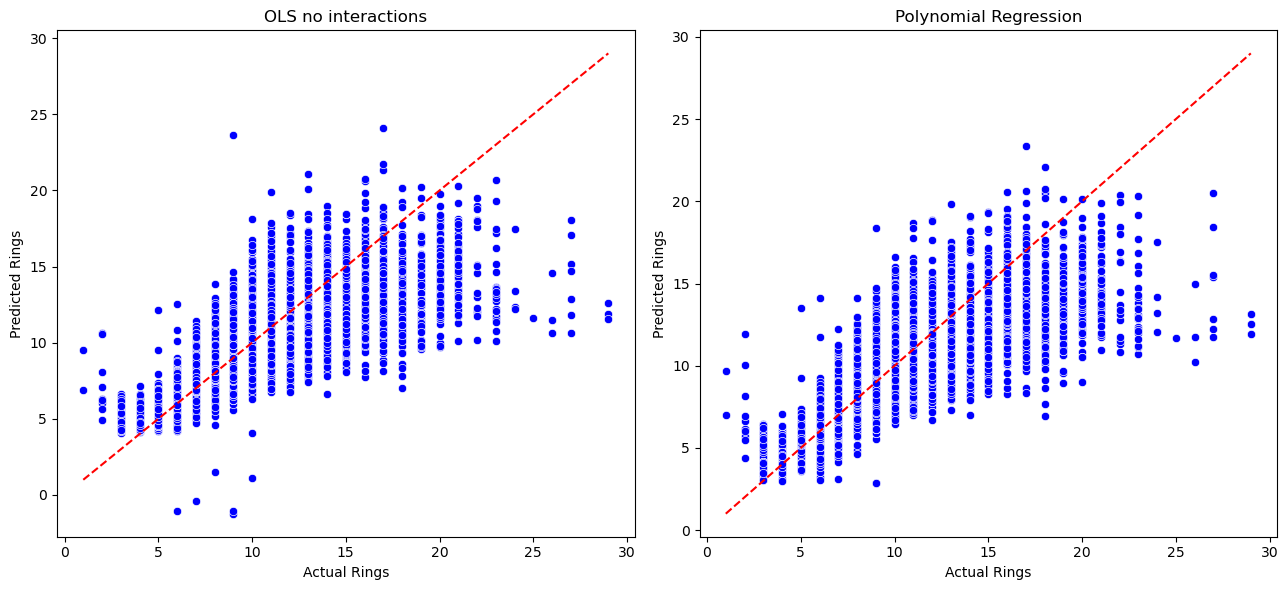

In [90]:

fig, axes = plt.subplots(1, 2, figsize=(13, 6))  # 1 row, 3 columns

sns.scatterplot(y=y_pred_test1,  x= y_test, ax=axes[0], color = 'blue')
sns.scatterplot(y=y_pred_test2, x= y_test, ax=axes[1], color = 'blue') 
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_title(f"OLS no interactions") # Set title for each plot
axes[0].set_xlabel("Actual Rings") # Set x label for each plot
axes[0].set_ylabel("Predicted Rings") # Set y label for each plot


axes[1].set_title(f"Polynomial Regression") # Set title for each plot
axes[1].set_xlabel("Actual Rings") # Set x label for each plot
axes[1].set_ylabel("Predicted Rings") # Set y label for each plot

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()


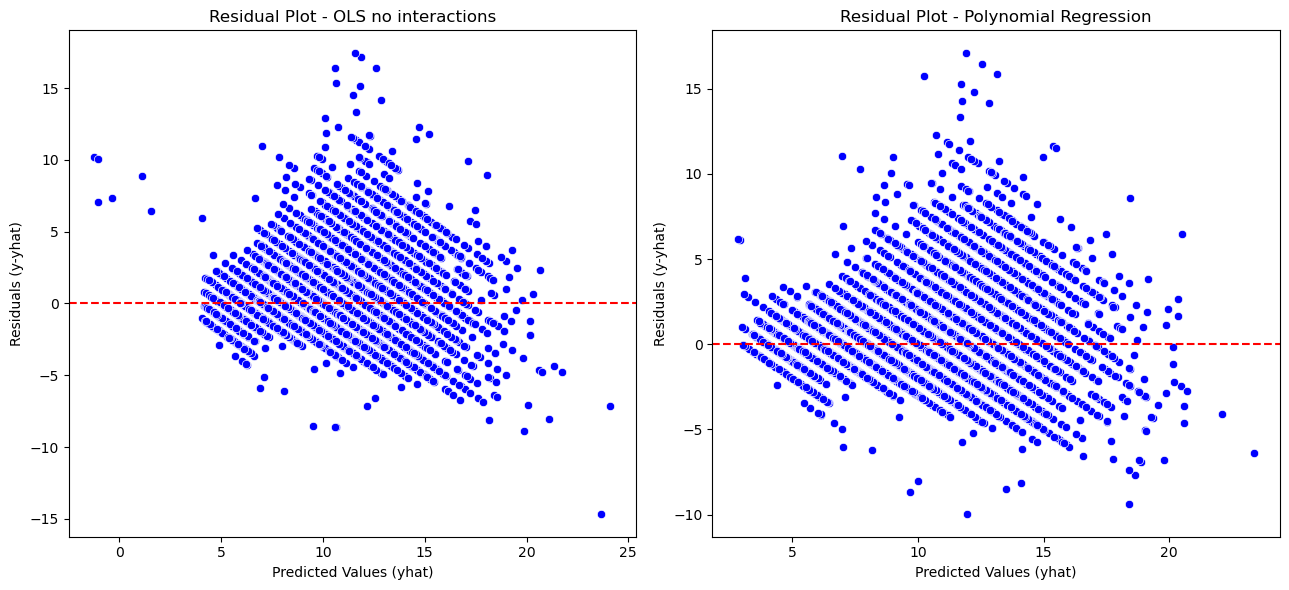

In [98]:
residuals1 = y_test - y_pred_test1
residuals2 = y_test - y_pred_test2
fig, axes = plt.subplots(1, 2, figsize=(13, 6))  # 1 row, 3 columns

sns.scatterplot(x= y_pred_test1, y=residuals1, ax=axes[0], color = 'blue')
sns.scatterplot(x= y_pred_test2, y=residuals2, ax=axes[1], color = 'blue')
axes[0].axhline(y = 0, color='red', linestyle='--')
axes[1].axhline(y = 0, color='red', linestyle='--')
axes[0].set_title(f"Residual Plot - OLS no interactions")
axes[0].set_xlabel("Predicted Values (yhat)")
axes[0].set_ylabel("Residuals (y-yhat)")


axes[1].set_title(f"Residual Plot - Polynomial Regression")
axes[1].set_xlabel("Predicted Values (yhat)")
axes[1].set_ylabel("Residuals (y-yhat)")

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

## Observations from residual plots
The residual plots do not show any clear trend in residuals. From the plot, one can see large residuals on both sides of the horizontal line at y = 0 indicating that the trend is mostly captured but the dataset has a lot of outliers.

Also, the second model does not predict any negative values.

## Prepare data for submission
I now turn my focus to use the second model to predict values and submit for the competition.

In [102]:
X = test.iloc[:, 1:]
X = sm.add_constant(X)
X = poly.transform(X)
y_pred = model2.predict(X)
output_df = test[['Id']].copy()
output_df['Rings'] = y_pred
output_df.columns = ['id', 'Rings']
output_df.to_csv('submission1.csv', index = False)
output_df.head()

,id,Rings
0,90615,9.261529
1,90616,9.746392
2,90617,10.469537
3,90618,10.127252
4,90619,7.652177


## Conceptual Question 3

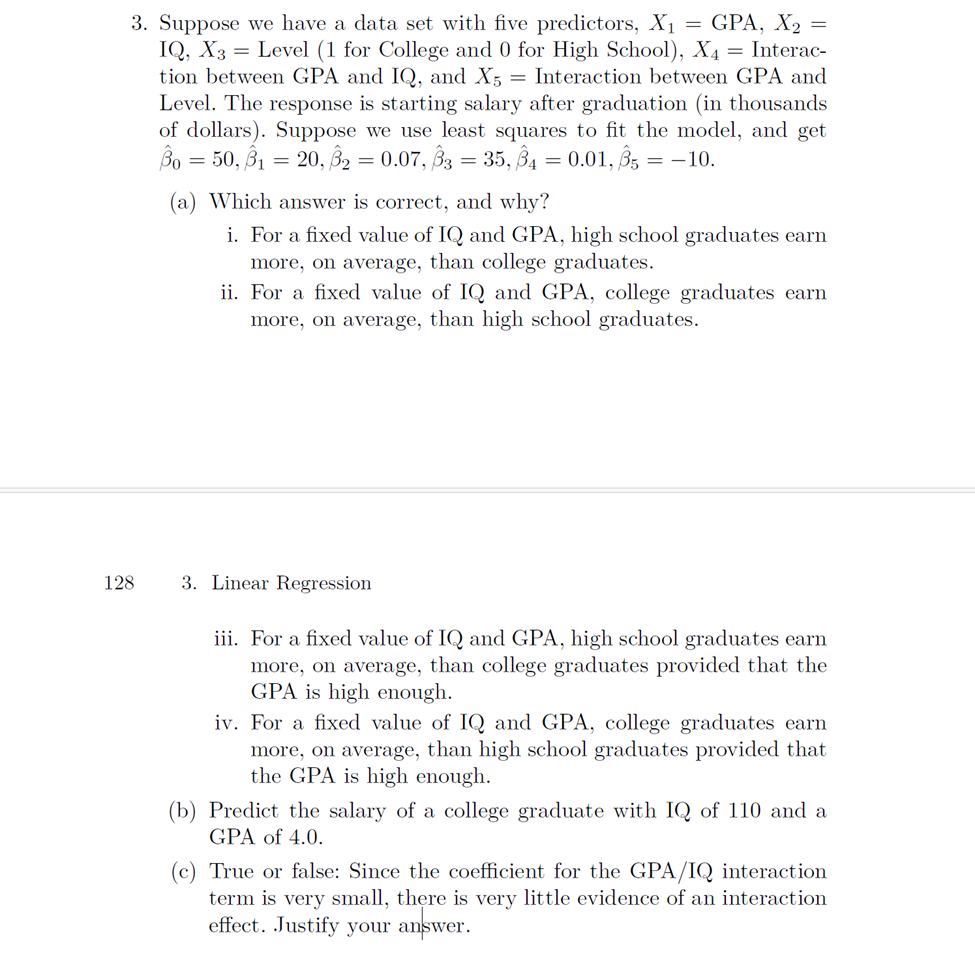

In [106]:
# X1 = GPA
# X2 = IQ
# X3 = Level (1 for College and 0 for High School)
# X4 = Interaction between GPA and IQ
# X5 = Interaction between GPA and Level. 
# Y = The response is starting salary after graduation (in thousands of dollars)
b0 = 50
b1 = 20
b2 = 0.07
b3 = 35
b4 = 0.01
b5 = -10
#Y =  b0 + b1 * x1  + b2 * x2  + b3 * x3  + b4 * x1 * x2 + b5 * x1 * x3
def predict_y(x1, x2, x3):
    return 50 + 20 * x1  + 0.07 * x2  + 35 * x3  + 0.01 * x1 * x2 - 10 * x1 * x3


predict_y(4, 110, 1)

137.1

In [108]:
50 + 20*4  + 0.07*110  + 35*1  + 0.01*4 * 110 - 10*4 * 1

137.1

## Conceptual Question 10

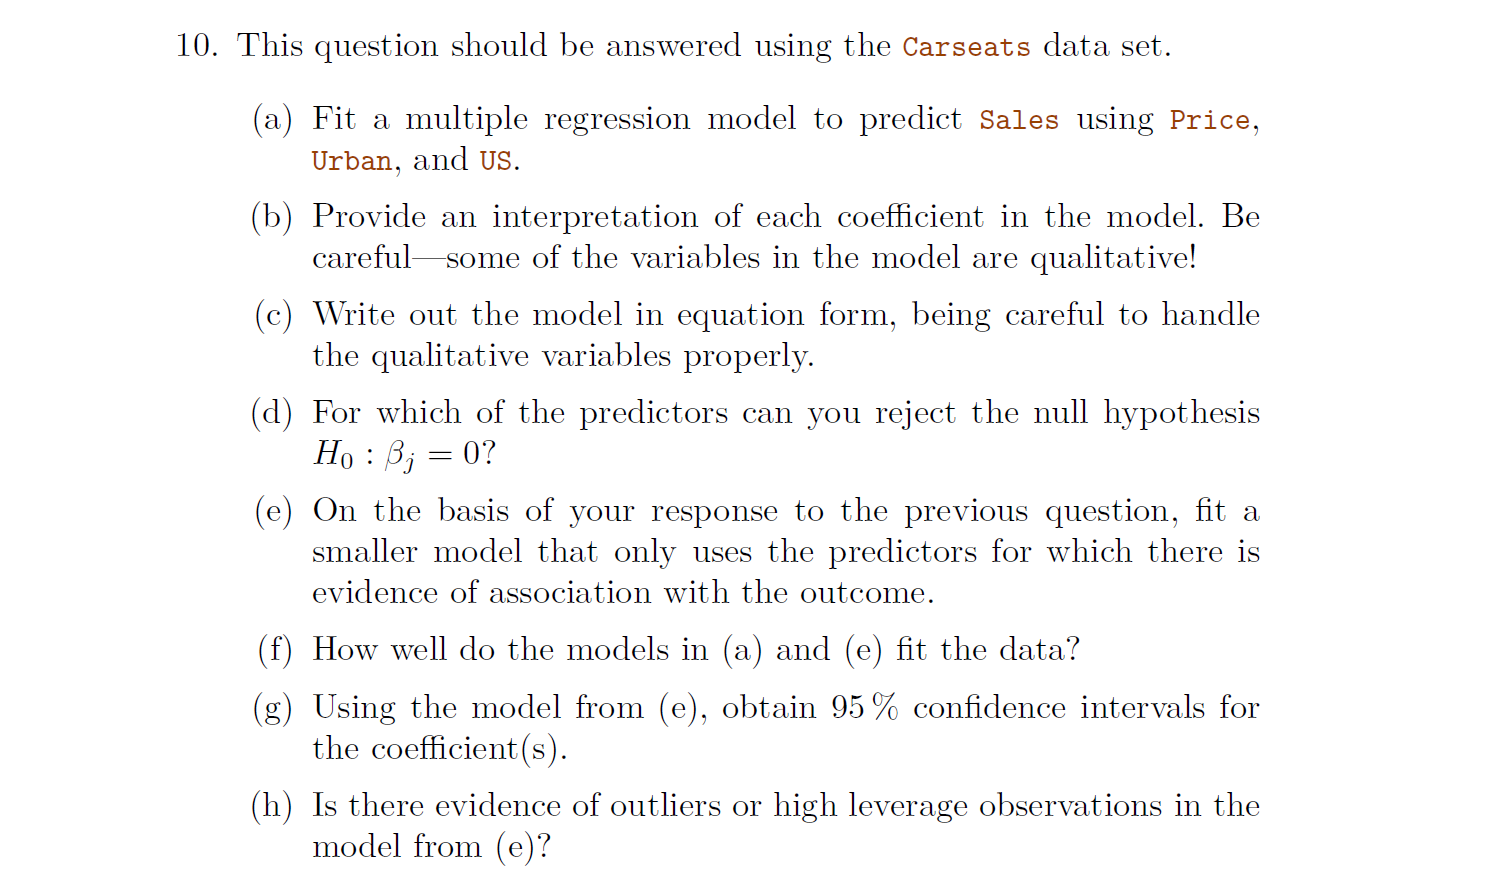

## Load Carseats dataset

In [113]:
carseats = load_data('Carseats')
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [115]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [117]:
carseats.US.value_counts(dropna=False)

US
Yes    258
No     142
Name: count, dtype: int64

In [119]:
carseats.Urban.value_counts(dropna=False)

Urban
Yes    282
No     118
Name: count, dtype: int64

## Create dummy columns for Urban and US.
Since these fields have only 2 unique values, I will just write a short function to create the dummies.

In [122]:
def create_dummy(x: str)->int:
    return 1 if x == 'Yes' else 0

for column in ['Urban', 'US']:
    carseats[f"{column}_Yes"] = carseats[column].apply(create_dummy)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,1,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,1,0


In [124]:
y=carseats.Sales
X = carseats[['Price', 'Urban_Yes', 'US_Yes']]
X = sm.add_constant(X)

# Fit the multiple regression model
carseats_model = sm.OLS(y, X).fit()

# Print the summary of the model
print(carseats_model.summary())

# Extracting specific metrics
degrees_of_freedom_model = carseats_model.df_model  # Model degrees of freedom
degrees_of_freedom_residual = carseats_model.df_resid  # Residual degrees of freedom
f_statistic = carseats_model.fvalue  # F-statistic
p_value = carseats_model.f_pvalue  # p-value of the overall model significance
params = len(carseats_model.params)-1
# Print key metrics
print("\nKey Metrics:")
print(f"Degrees of Freedom (Model): {degrees_of_freedom_model}")
print(f"Degrees of Freedom (Residual): {degrees_of_freedom_residual}")
print(f"F-statistic: {f_statistic}")
print(f"P-value of the overall model significance: {p_value}")

y_pred_sales = carseats_model.predict(X)
# _= compute_and_print_mean_errors(y, y_pred_sales, params)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 02 Feb 2025   Prob (F-statistic):           2.39e-23
Time:                        19:34:35   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

In [126]:
y=carseats.Sales
X = carseats[['Price', 'US_Yes']]
X = sm.add_constant(X)

# Fit the multiple regression model
carseats_model = sm.OLS(y, X).fit()

# Print the summary of the model
print(carseats_model.summary())

# Extracting specific metrics
degrees_of_freedom_model = carseats_model.df_model  # Model degrees of freedom
degrees_of_freedom_residual = carseats_model.df_resid  # Residual degrees of freedom
f_statistic = carseats_model.fvalue  # F-statistic
p_value = carseats_model.f_pvalue  # p-value of the overall model significance
params = len(carseats_model.params)-1
# Print key metrics
print("\nKey Metrics:")
print(f"Degrees of Freedom (Model): {degrees_of_freedom_model}")
print(f"Degrees of Freedom (Residual): {degrees_of_freedom_residual}")
print(f"F-statistic: {f_statistic}")
print(f"P-value of the overall model significance: {p_value}")

y_pred_sales = carseats_model.predict(X)
# _ =compute_and_print_mean_errors(y, y_pred_sales, params)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 02 Feb 2025   Prob (F-statistic):           2.66e-24
Time:                        19:34:35   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

## Calculation of Confidence Intervals

`CI = estimate + t_stat * standard_error` where `estimate` is the coeficent estimated for the model, `t_stat` is the t statistic for the level of confidence, and `standard_error` is the standard error for the coefficient extracted from the model.

In [129]:
confidence_intervals_95 = carseats_model.conf_int(alpha = 0.05).reset_index(drop = False)
confidence_intervals_95.columns = 'Parameter LowerBound, UpperBound'.split()
confidence_intervals_95

,Parameter,"LowerBound,",UpperBound
0,const,11.79032,14.271265
1,Price,-0.06476,-0.044195
2,US_Yes,0.69152,1.707766


Potential Outliers: (array([ 17,  25,  28,  30,  49,  50,  57,  62,  68,  82,  98, 106, 143,
       209, 258, 297, 298, 304, 316, 328, 352, 376, 395], dtype=int64),)


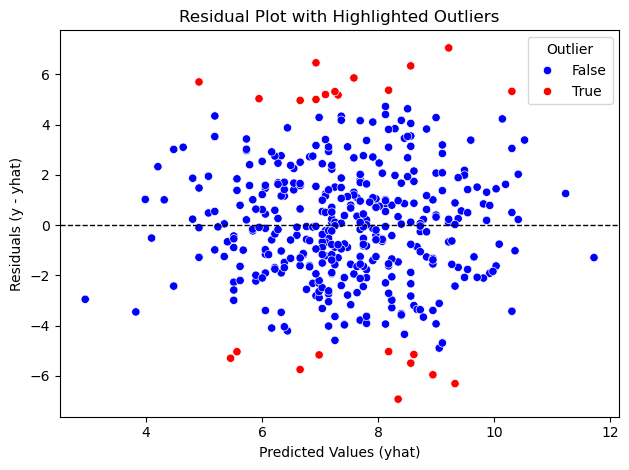

In [131]:
# Standardized residuals
influence = carseats_model.get_influence()
standardized_residuals = influence.resid_studentized_internal

# Flag points with |r*| > 2
outliers = abs(standardized_residuals) > 2
print("Potential Outliers:", outliers.nonzero())

residuals = y - y_pred_sales

# Create a DataFrame for easier plotting

plot_data = pd.DataFrame({
    'Predicted': y_pred_sales,
    'Residuals': residuals,
    'Outlier': outliers  # Boolean for outlier status
})

# Plot with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=plot_data, x='Predicted', y='Residuals', hue='Outlier', 
                palette={True: 'red', False: 'blue'}, legend=True)

# Add the horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Set title and axis labels
plt.title("Residual Plot with Highlighted Outliers")
plt.xlabel("Predicted Values (yhat)")
plt.ylabel("Residuals (y - yhat)")

plt.tight_layout()
plt.show()


## Interpretation of the model coefficients.
From the summary of the model above

### (a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.
The regression model has already been fitted, and the summary output is provided:

```Sales = 13.0435 - 0.0545 * Price - 0.0219 * Urban_Yes + 1.2006 * US_Yes```

### (b) Provide an interpretation of each coefficient in the model.
1. **Intercept (`const` = 13.0435):** When `Price = 0`, `Urban` is "No," and `US` is "No," the predicted `Sales` is 13.0435 units. This represents the contribution from other variables not used in the model.
2. **Price (`-0.0545`):** For every one-unit increase in `Price`, the predicted `Sales` decreases by 0.0545 units, holding all other variables constant.
3. **Urban (`-0.0219`):** If the location is urban (`Urban = Yes`), predicted `Sales` decreases by 0.0219 units compared to non-urban locations, holding other variables constant. However, the effect is not statistically significant (p = 0.556).
4. **US (`1.2006`):** If the location is in the US (`US = Yes`), predicted `Sales` increases by 1.2006 units compared to non-US locations, holding other variables constant. This effect is statistically significant (p < 0.001).

### (c) Write out the model in equation form.

```Sales = 13.0435 - 0.0545 * Price - 0.0219 * Urban_Yes + 1.2006 * US_Yes```

Where:
- `Urban_Yes` = 1 if the location is urban, 0 otherwise.
- `US_Yes` = 1 if the location is in the US, 0 otherwise.
-  `Price` = The listed selling price of a car, representing the amount a seller is asking for the vehicle in the market.

### (d) For which predictors can you reject the null hypothesis (H_0 :B = 0)?
The null hypothesis can be rejected for predictors with a p-value < 0.05:
1. **Price (p = 0.000):** Significant predictor of `Sales`.
2. **US_Yes (p = 0.000):** Significant predictor of `Sales`.

We cannot reject the null hypothesis for:
- **Urban (p = 0.556):** Not a significant predictor of `Sales`.

### (e) Fit a smaller model using only significant predictors.
The smaller model includes `Price` and `US` since they are the only significant predictors:

```Sales = 13.0308 - 0.0545 * Price + 1.1996 * US_Yes```

### (f) How well do the models fit the data?
1. **Full model:**
- R^2 = 0.239: The model explains 23.9% of the variance in `Sales`.
- Adjusted R^2 = 0.234 : Adjusts for the number of predictors, still indicates a weak fit.
- F-statistic: 41.52

2. **Smaller model:**
- R^2 = 0.239: The model explains 23.9% of the variance in `Sales`.
- Adjusted R^2 = 0.235: Adjusts for the number of predictors, still indicates a weak fit.
- F-statistic: 62.43

### (g) Obtain 95% confidence intervals for the coefficients in the smaller model.
From the regression output:
1. **Intercept (`const`):** [11.790, 14.271]
2. **Price:** [-0.065, -0.044]
3. **USYes:** [0.692, 1.708]

### (h) Is there evidence of outliers or high leverage observations?
The output does not directly provide leverage statistics or Cook's distance, but residuals vs fitted plot above does indicate that there are outliers in the dataset. In this case, I have defined outliers as points that have a studentized t score greater than 2.
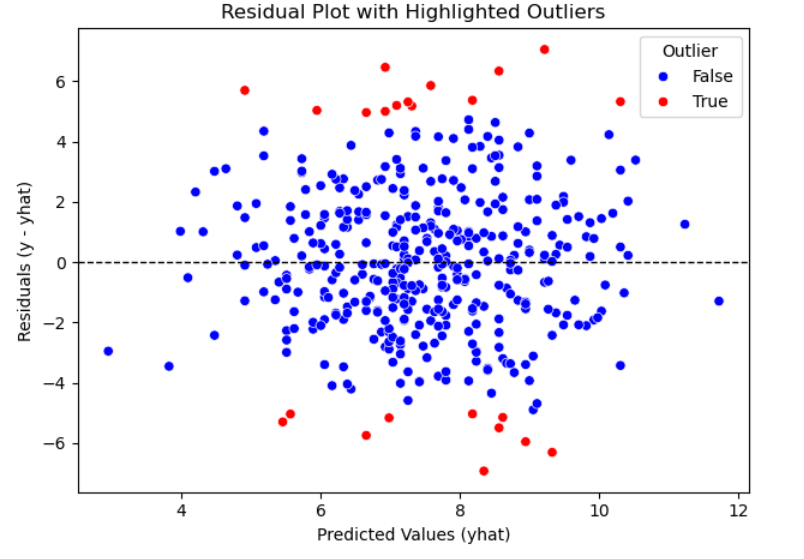

# Assignment 3 begins here.

## Conceptual Question 2
This is Question number 8 of ISLP. A screenshot of the question is below.
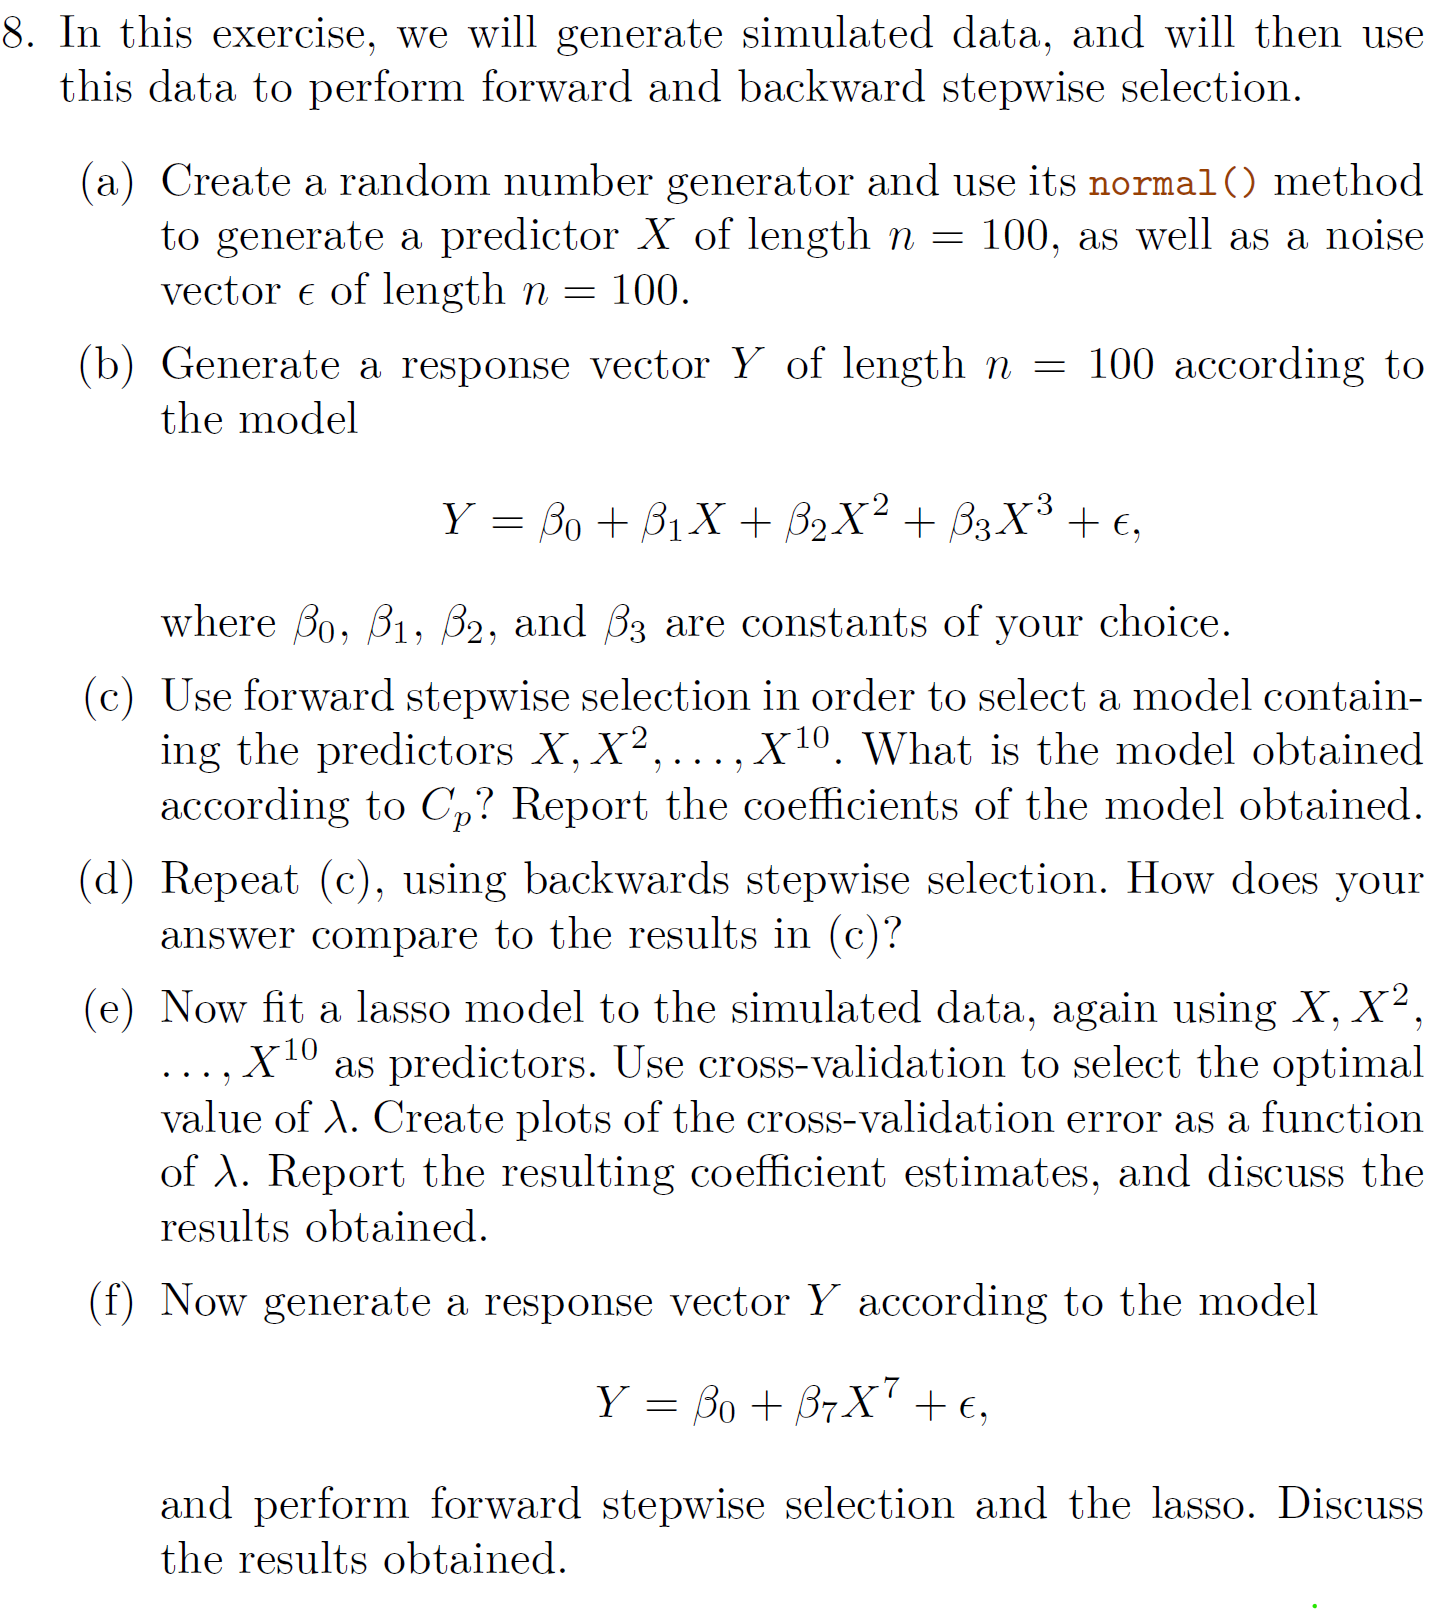

# Solution to Question 8 - Simulated Data and Model Selection

## (a) Generate Predictor and Noise
We use a random number generator to generate:
- A predictor \( X \) of length \( n = 100 \) from a normal distribution.
- A noise vector \( \epsilon \) of length \( n = 100 \), also from a normal distribution.

In [11]:
np.random.seed(42)  # For reproducibility
n = 100
X = np.random.normal(size=n)
epsilon = np.random.normal(size=n)

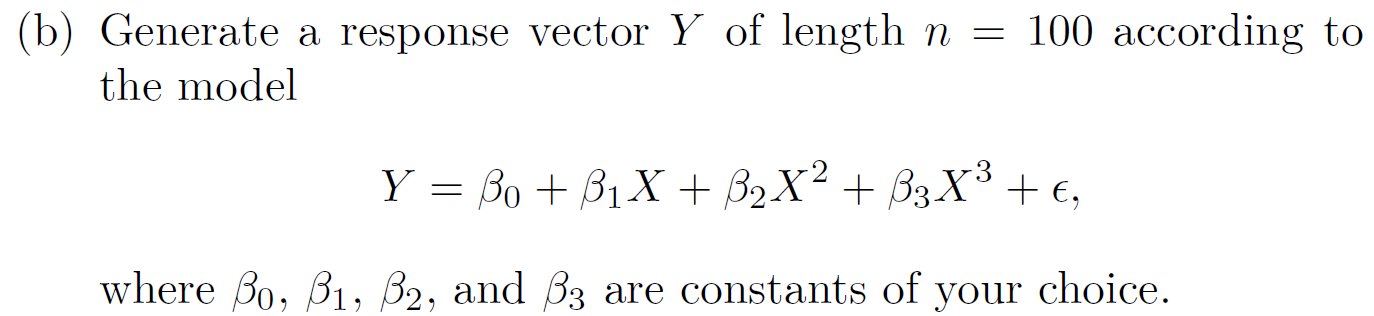

In [17]:
beta_0, beta_1, beta_2, beta_3 = 1, 2, 3, 4
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

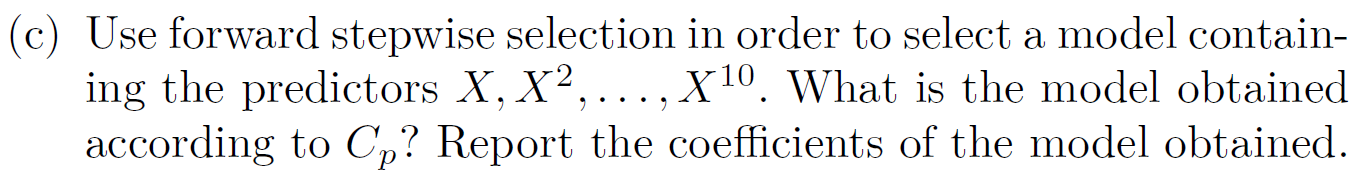

- We fit a sequence of models using forward stepwise selection with predictors $X^1, X^2, ..., X^10$
- The best model is chosen based on $C_p$ which is defined below. We first estimate signma2 using an initial model.

In [41]:
def nCp(sigma2, estimator, X, Y):
    "negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)

    #sigma2 = RSS / (n - p)  # Estimate of error variance
    return -(RSS + 2 * p * sigma2) / n

sigma2 = sm.OLS(Y,X).fit().scale
sigma2

37.004544415414536

In [47]:
#Set the scorer to neg_Cp which is or nCp function with the sigma value set to the estimated value above.
neg_Cp = partial(nCp, sigma2)
# Generate polynomial features
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1, 1))

Selected features [ True  True  True  True  True False False False False False]
Selected Features: [1 2 3 4 5]


## Perform Forward Stepwise Selection

In [106]:
model = LinearRegression()
forward_selector = SequentialFeatureSelector(model, direction='forward', n_features_to_select="auto", scoring=neg_Cp)
forward_selector.fit(X_poly, Y)

selected_features = forward_selector.get_support()
print('Selected features', selected_features)
print(f"Selected Features: {np.where(selected_features)[0] + 1}")  # Feature indices
X_features_selected = forward_selector.transform(X_poly)

# Train the model on the selected features
model.fit(X_features_selected, Y)

Selected features [ True  True  True  True  True False False False False False]
Selected Features: [1 2 3 4 5]


LinearRegression()

In [108]:
y_pred = model.predict(X_features_selected)
score = -neg_Cp(model, X_features_selected, Y)
score

4.529729066658209

## Reporting Model Coefficients

In [111]:
model.coef_

array([ 2.03917333,  3.36419207,  3.90116642, -0.04873429,  0.00935198])

In [113]:
model_coeficents_forward = pd.DataFrame({'Variables': [f'X{i+1}' for i in forward_selector.get_support(indices=True)], "Coefficients": model.coef_})
model_coeficents_forward

,Variables,Coefficients
0,X1,2.039173
1,X2,3.364192
2,X3,3.901166
3,X4,-0.048734
4,X5,0.009352


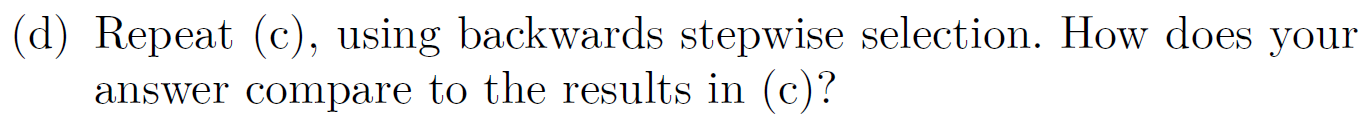

## Perform Backward Stepwise Selection

In [117]:
model = LinearRegression()
backward_selector = SequentialFeatureSelector(model, direction='backward', n_features_to_select="auto", scoring=neg_Cp)
backward_selector.fit(X_poly, Y)

selected_features = backward_selector.get_support()
print('Selected features', selected_features)
print(f"Selected Features: {np.where(selected_features)[0] + 1}")  # Feature indices

X_features_selected = backward_selector.transform(X_poly)

# Train the model on the selected features
model.fit(X_features_selected, Y)

Selected features [ True  True  True  True False  True False False False False]
Selected Features: [1 2 3 4 6]


LinearRegression()

### Reporting Model Coefficients

In [120]:
model_coeficents_backward = pd.DataFrame({'Variables': [f'X{i+1}' for i in backward_selector.get_support(indices=True)], "Coefficients": model.coef_})
model_coeficents_backward

,Variables,Coefficients
0,X1,2.030271
1,X2,3.209840
2,X3,3.930448
3,X4,0.041195
4,X6,-0.012322


### Comparison from using Forward vs Backward stepwise feature selection.
As seen in the the two tables of features above, most of the features are roughly equal in magnitude for both forward and backward stepwise procedures. 
- However, the backward selection process excluded the $X^5$ while the forward process used the first 5 positive degrees of X. <br>
- Both approaches also ended up with an equal number of parameters in the polynomial.

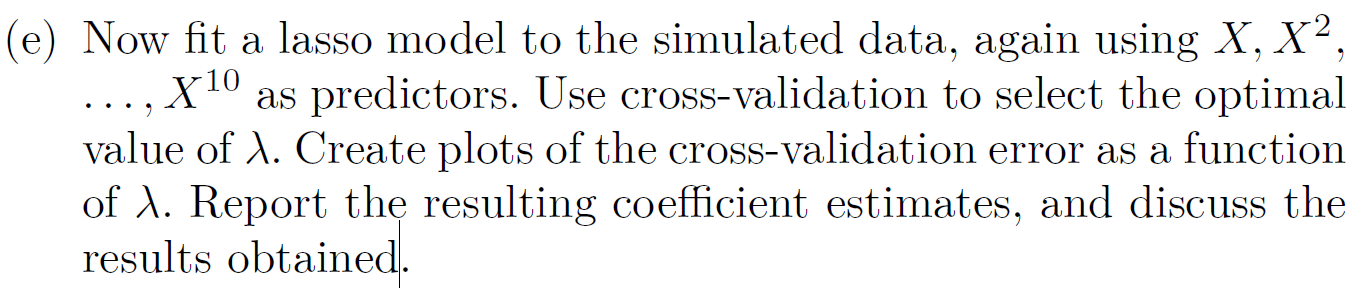

In [382]:
lasso = Lasso()
K = 10 # Number of folds for cross validation
lambdas = 10**np.linspace(2, -2, 10) / Y.std()
# Define the parameter grid for alpha (regularization strength)
param_grid = {'alpha': lambdas}# np.logspace(-4, 1, 20)}  # Exploring alphas from 1e-4 to 10

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=K, scoring='neg_mean_squared_error')#make_scorer(mean_squared_error))  # 10-fold cross-validation
grid_search.fit(X_poly, Y)

# Get the best model from grid search and the best alpha value
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

grid_search_results = grid_search.cv_results_
    
# Extract mean test scores and alphas for plotting
mean_test_scores = grid_search_results['mean_test_score']
alphas = grid_search_results['param_alpha'].data

print("All alphas:", alphas) 
print("Best alpha found:", best_params['alpha'])  # Display the best alpha
print("Coefficients:", best_model.coef_)  # View the coefficients for each polynomial feature
print("Mean Test Scores:", mean_test_scores)

All alphas: [9.260397568081848 3.3280143312435686 1.1960263376960758
 0.4298295794682364 0.15447274158003452 0.0555146249375689
 0.019950921764162435 0.007169989524154412 0.002576760632124215
 0.0009260397568081848]
Best alpha found: 0.0009260397568081848
Coefficients: [ 1.77765995e+00  3.26534447e+00  4.34869424e+00 -2.38654245e-02
 -1.24183101e-01  1.44820899e-03 -9.35022845e-04 -1.16500099e-04
  1.62201525e-03 -9.36756893e-05]
Mean Test Scores: [-160.46628024 -246.28404627  -20.66499651  -92.41120679   -4.75286079
   -5.21640618   -4.01362079   -8.55662514   -5.61484149   -2.79237423]


C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.216e+02, tolerance: 1.033e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.266e+00, tolerance: 1.090e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

In [385]:
10**np.linspace(8, -2, 10)

array([1.00000000e+08, 7.74263683e+06, 5.99484250e+05, 4.64158883e+04,
       3.59381366e+03, 2.78255940e+02, 2.15443469e+01, 1.66810054e+00,
       1.29154967e-01, 1.00000000e-02])

### Plot of Cross validation Errors.

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\snde\AppData\Local\Temp\ipykernel_12784\4213904084.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


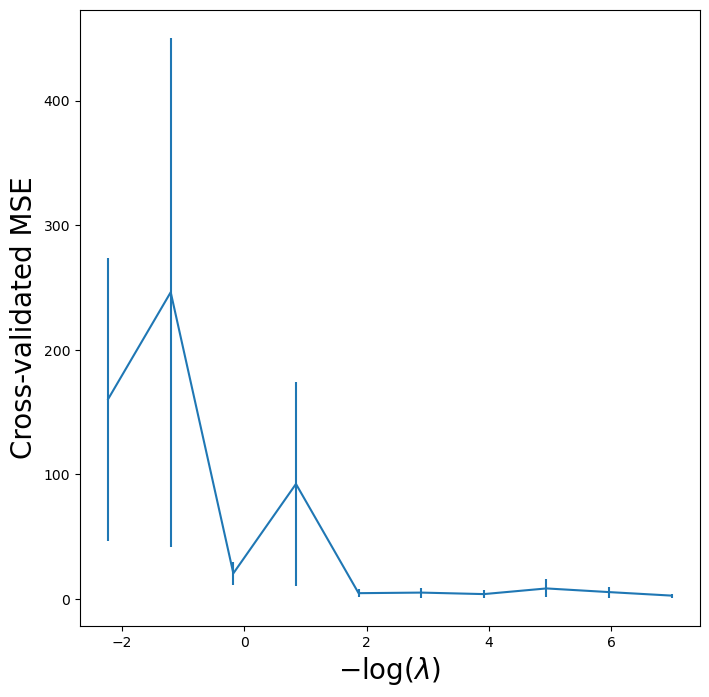

In [389]:
_, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid_search_results['mean_test_score'],
            yerr=grid_search_results['std_test_score'] / np.sqrt(K))
#ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

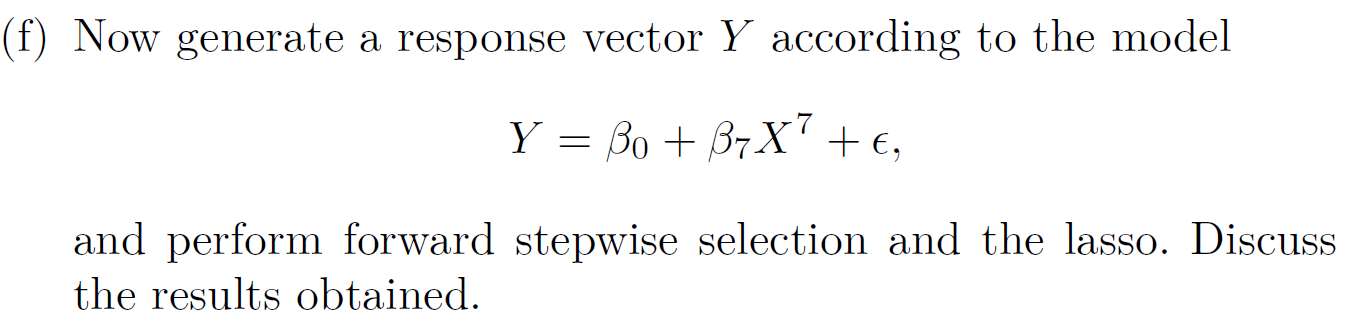

Setting $\beta_0 = 3$, and $\beta_1 = 1$

In [395]:
b0 = 3
b7 = 1
Y1 = b0 + b7* X**7 + epsilon

In [397]:
model = LinearRegression()
forward_selector = SequentialFeatureSelector(model, direction='forward', n_features_to_select="auto", scoring=neg_Cp)
forward_selector.fit(X_poly, Y1)

selected_features = forward_selector.get_support()
print('Selected features', selected_features)
print(f"Selected Features: {np.where(selected_features)[0] + 1}")  # Feature indices

X_features_selected = forward_selector.transform(X_poly)

Selected features [False  True  True  True False  True  True False False False]
Selected Features: [2 3 4 6 7]


In [399]:
# Train the model on the selected features
model.fit(X_features_selected, Y1)

model_coeficents_forward = pd.DataFrame({'Variables': [f'X{i+1}' for i in forward_selector.get_support(indices=True)], "Coefficients": model.coef_})
model_coeficents_forward

,Variables,Coefficients
0,X2,0.171418
1,X3,-0.041285
2,X4,0.080182
3,X6,-0.021382
4,X7,0.997892


In [424]:
lasso = Lasso()
K = 10 # Number of folds for cross validation
lambdas = 10**np.linspace(3, -1, 100) / Y1.std()
# Define the parameter grid for alpha (regularization strength)
param_grid = {'alpha': lambdas}# np.logspace(-4, 1, 20)}  # Exploring alphas from 1e-4 to 10

# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=K, scoring='neg_mean_squared_error')#make_scorer(mean_squared_error))  # 10-fold cross-validation
grid_search.fit(X_poly, Y1)

# Get the best model from grid search and the best alpha value
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

grid_search_results = grid_search.cv_results_
    
# Extract mean test scores and alphas for plotting
mean_test_scores = grid_search_results['mean_test_score']
alphas = grid_search_results['param_alpha'].data

print("All alphas:", alphas) 
print("Best alpha found:", best_params['alpha'])  # Display the best alpha
print("Coefficients:", best_model.coef_)  # View the coefficients for each polynomial feature
print("Mean Test Scores:", mean_test_scores)

C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.086e+02, tolerance: 7.490e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.713e+02, tolerance: 7.442e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

All alphas: [11.526865689971487 10.502850711447495 9.569806401312022 8.719651176111116
 7.945021397991066 7.239207594390081 6.59609634379665 6.0101173242170525
 5.476195065711062 4.989704989099331 4.546433350070956 4.142540741746027
 3.7745288395700145 3.4392101005000146 3.1336801540318207
 2.8552926459320456 2.6016363167837286 2.3705141168108135
 2.159924176084014 1.9680424652811885 1.7932069968179305
 1.6339034295062038 1.4887519520554233 1.3564953318071336
 1.2359880251871833 1.1261862555552946 1.0261389725111447
 0.9349796143507709 0.8519186023236455 0.7762365016792686
 0.707277790267528 0.6444451807194337 0.5871944470296637
 0.5350297107312589 0.4874991458335668 0.4441910653216595
 0.4047303553203588 0.36877522603729934 0.3360142513432582
 0.3061636713480058 0.2789649346078858 0.2541824586768984
 0.2316015896042543 0.2110267427045408 0.19227970849674358
 0.1751981091389757 0.1596339919892914 0.14545254811068067
 0.13253094462054862 0.12075726077104836 0.11002951854510527
 0.100254

C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+01, tolerance: 3.309e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.781e+01, tolerance: 3.309e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\snde\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
C:\Users\snde\AppData\Local\Temp\ipykernel_12784\4075275324.py:5: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


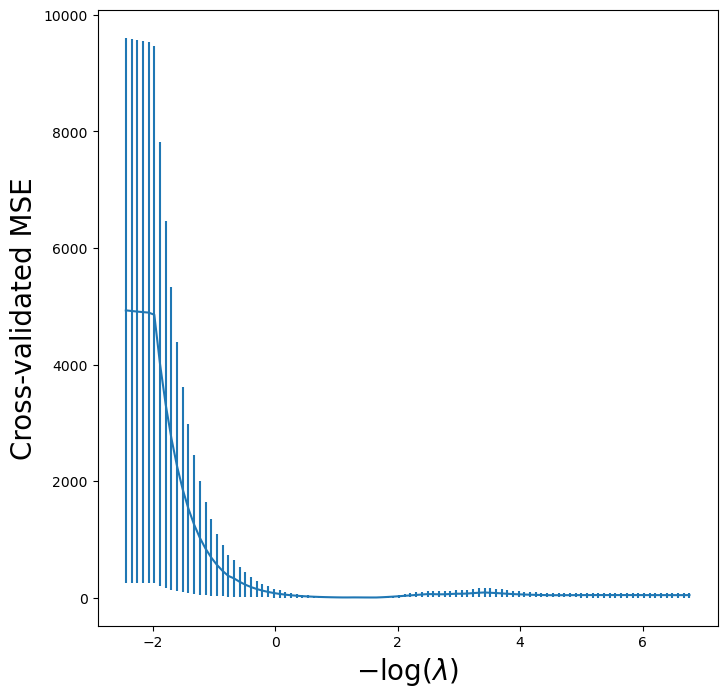

In [431]:
_, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid_search_results['mean_test_score'],
            yerr=grid_search_results['std_test_score'] / np.sqrt(K))
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);